## Reg_logísitica

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 1. Obtener y analizar datos

In [11]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')   
    return df

In [12]:
entrenamiento = leer_datos("data_Titanic.csv")
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
"""Analizo valores, en este caso tenemos varios datos nullos"""
entrenamiento.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<AxesSubplot:>

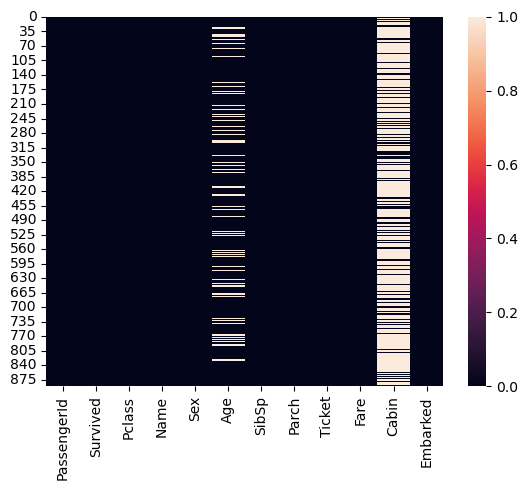

In [15]:
"""los espacios en blanco representan los valores faltantes/nulos"""
sns.heatmap(entrenamiento.isna())

<AxesSubplot:xlabel='Survived', ylabel='count'>

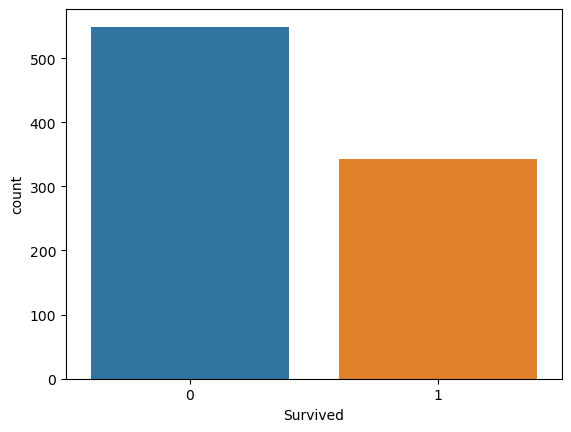

In [16]:
"""NO no sobreviven"""
sns.countplot(x='Survived', data=entrenamiento)

<AxesSubplot:xlabel='Survived', ylabel='count'>

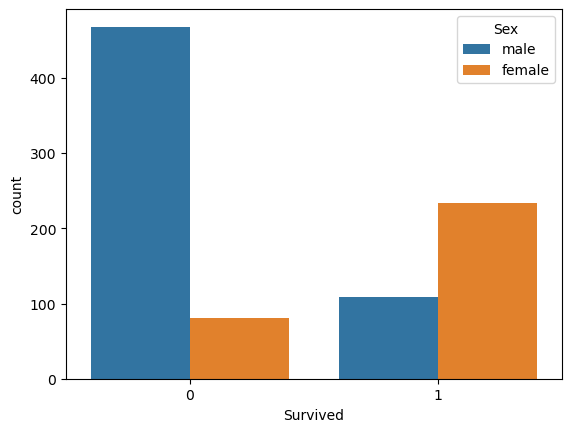

In [17]:
sns.countplot(x='Survived', data=entrenamiento, hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

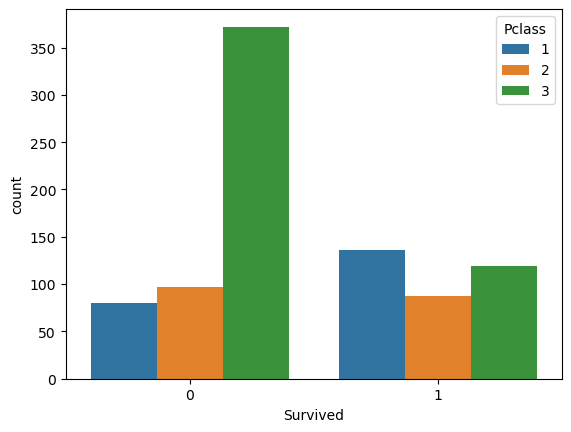

In [18]:
sns.countplot(x='Survived', data=entrenamiento, hue="Pclass")

C:\Users\Paulina Males\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'kde elimina la parte de linea curva q muestra la normal\npuedo especificar el # de columnas con bins'

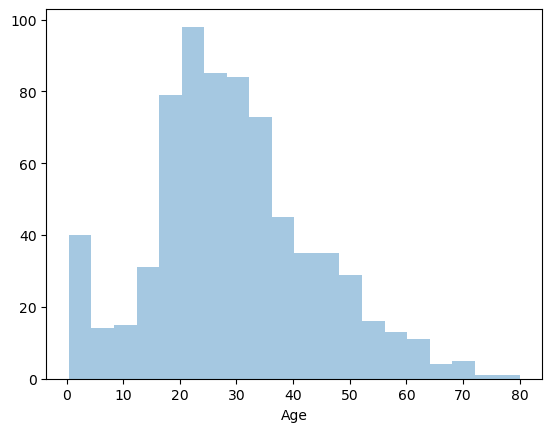

In [19]:
"""vemos q la mayor parte esta entre los 20 y 40"""
sns.distplot(entrenamiento["Age"].dropna(), kde=False)
"""kde elimina la parte de linea curva q muestra la normal
puedo especificar el # de columnas con bins"""
# sns.distplot(entrenamiento["Age"].dropna(), kde=False, bins=30)

'0 representa la gente qu no tenia familiares, 1 la gente con 200 familiares'

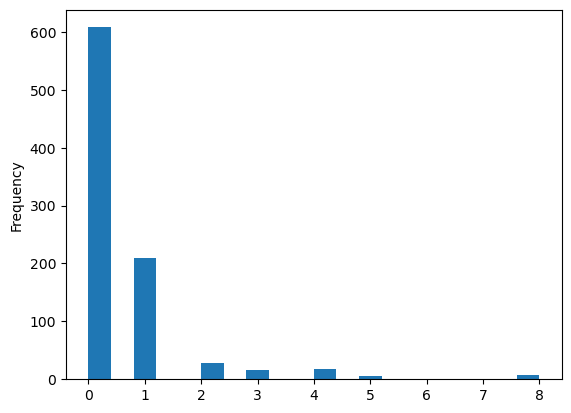

In [20]:
# numero de familiares de c/pasajero
entrenamiento['SibSp'].plot.hist(bins=20)
"""0 representa la gente qu no tenia familiares, 1 la gente con 200 familiares"""

### 2. Limpieza de datos

<AxesSubplot:>

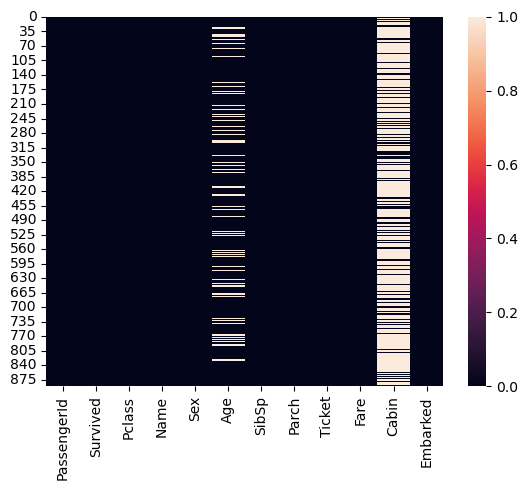

In [21]:
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

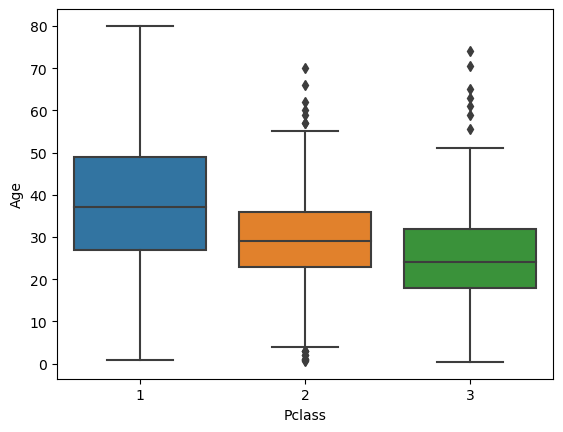

In [22]:
# vamos a modificar el valor nullo por el valor medio
# calcular la edad media x cada una de las categorias (1ra,2da,y 3ra clase)
"""la linea que divide la caja representa el valor medio
38 clase 1, 30 clase 2, 25 clase 3"""
sns.boxplot(x="Pclass", y="Age", data=entrenamiento)

In [23]:
#rellenar valore nulos con la media de los valores
def calcular_edad_media(columnas):
    edad= columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad
    
# Invoco a la función calcular_edad_media 
entrenamiento["Age"] = entrenamiento[["Age","Pclass"]].apply(calcular_edad_media, axis=1)
entrenamiento.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [26]:
# Borramos la columna Cabin
entrenamiento.drop("Cabin",axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

<AxesSubplot:>

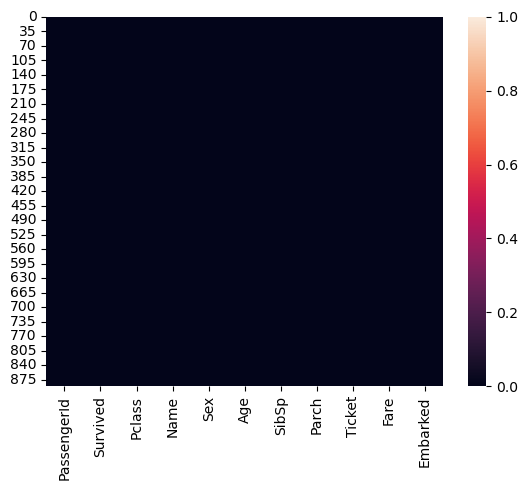

In [25]:
# Visualizamos los datos actuales
sns.heatmap(entrenamiento.isnull())

In [27]:
#queda asi el dataset, lo q interesa es dejar las columnas numericas
# por tanto podemos eliminar columnas alfanumericas Nombre y Ticket
entrenamiento.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [28]:
entrenamiento.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [29]:
"""sexo es alfanumerica sin embargo podria ser importante,
por tanto la convertimos en numerica con getdummiers hombre = 1 , mujer = 0
lo que era 1 columas ahora son dos donde o es 1 o es 0"""
pd.get_dummies(entrenamiento["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
"""basta con mostrar una columna"""
sexo = pd.get_dummies(entrenamiento["Sex"], drop_first=True)
sexo.head(3)

,male
0,1
1,0
2,0


In [31]:
#se añade al dataset y borro la que ya no hace falta
entrenamiento = pd.concat([entrenamiento,sexo],axis=1)
entrenamiento.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0


In [32]:
entrenamiento.drop("Sex",axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0


In [33]:
#Cambiamos los valores alfanumericos en numericos
puerto= pd.get_dummies(entrenamiento["Embarked"])
puerto.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [35]:
# es suficiente quedarse con 2 columnas, 
#si dos son 0 0 qioeres decir que es de al categoria que falta
puerto= pd.get_dummies(entrenamiento["Embarked"],drop_first=True)
puerto.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [36]:
entrenamiento = pd.concat([entrenamiento,puerto],axis=1)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1


In [37]:
# Elimino Embarked	
entrenamiento.drop("Embarked",axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [38]:
entrenamiento=entrenamiento.rename(columns={"male":"Sex"})
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


# DIVIDAR LA DATA 

In [63]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
cols = [col for col in entrenamiento if col != entrenamiento.columns[-9]] + [entrenamiento.columns[-9]] 
entrenamiento = entrenamiento[cols]
entrenamiento.head(3)

,Pclass,Age,SibSp,Parch,Sex,Q,S,Fare,Survived
0,3,22.0,1,0,1,0,1,7.2500,0
1,1,38.0,1,0,0,0,0,71.2833,1
2,3,26.0,0,0,0,0,1,7.9250,1


In [1]:
x = entrenamiento.iloc[:, :-3] # tomo las caracteristicas ..todas las columnas q no son precios
x


NameError: name 'entrenamiento' is not defined

In [65]:
y = entrenamiento['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [81]:
#dividir la data con split
# entremiento 70 - 30%.. aleatoreamente
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)



In [82]:
#creacion modelo 
modelo = LogisticRegression() #entreno al modelo
#modelo.fit(x_train,y_train)

In [78]:
print(classification_report(y_test, y_pred)) #menos al 65% el modelo solo esta memorizando

ValueError: Found input variables with inconsistent numbers of samples: [268, 418]

In [80]:
print("Coeficiente de determinación R^2:", modelo.score(x_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [418, 268]

### 3. Divido los datos 

In [39]:
# me interasa saber si sobrevive o no, dividimos la data
x_train = entrenamiento.iloc[:, 1:] # carcateristicas
y_train = entrenamiento["Survived"] # etiqueta(test)



In [40]:
x_train #(variable independiente, no debe estar la etiqueta que se evalua)

,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [41]:
y_train #(variable dependiente)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Datos test

In [47]:
# como los datos estaban divididos en train y test 
# utilizao los de test
prueba = leer_datos("test_Titanic.csv")
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
"""realizo el mismo taratamiento de datos"""
prueba.isna().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

<AxesSubplot:>

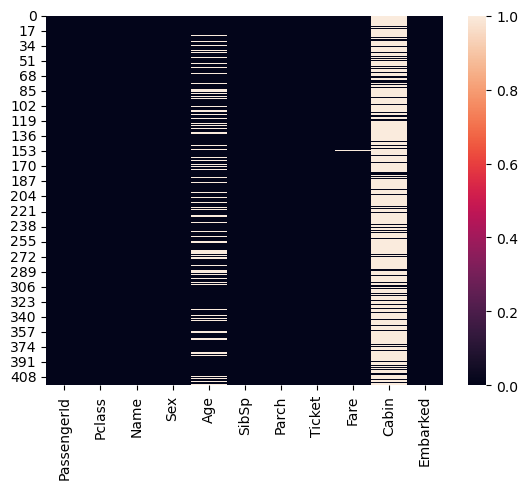

In [49]:
sns.heatmap(prueba.isnull())

In [50]:
# tratar con Fare
"""NO puede haber nulos porq el modelo no se ejecuta"""
prueba = prueba.fillna(value=0)
prueba.isna().sum().sort_values()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

'la linea que divide la caja representa el valor medio\n41 clase 1, 25 clase 2, 23 clase 3'

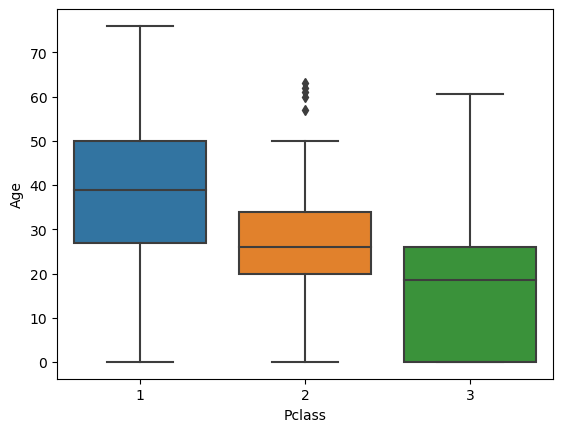

In [51]:
# vamos a modificar el valor nullo por el valor medio
# calcular la edad media x cada una de las categorias (1ra,2da,y 3ra clase)
sns.boxplot(x="Pclass", y="Age", data=prueba)
"""la linea que divide la caja representa el valor medio
41 clase 1, 25 clase 2, 23 clase 3"""

In [52]:
#rellenar valore nulos con estos valores
def calcular_edad_media(columnas):
    edad= columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 41
        elif clase == 2:
            return 25
        else:
            return 23
    else:
        return edad
    
# Invoco a la función calcular_edad_media 
prueba["Age"] = prueba[["Age","Pclass"]].apply(calcular_edad_media, axis=1)
prueba.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q


In [53]:
# Borramos las para equiparar con tarin
prueba.drop(["Name","Ticket","PassengerId","Cabin"],axis=1,inplace=True)

In [54]:
prueba.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


In [55]:
sexo = pd.get_dummies(prueba["Sex"], drop_first=True)
prueba = pd.concat([prueba,sexo],axis=1)
prueba.drop("Sex",axis=1,inplace=True)
prueba=prueba.rename(columns={"male":"Sex"})

In [56]:
puerto= pd.get_dummies(prueba["Embarked"])
puerto= pd.get_dummies(prueba["Embarked"],drop_first=True)
prueba = pd.concat([prueba,puerto],axis=1)
prueba.drop("Embarked",axis=1,inplace=True)

In [57]:
prueba.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0


In [58]:
x_test = prueba # carcateristicas
#anadir columnas
y_test = pd.DataFrame(np.random.randint(0, 2, (418, 1))) #lo que el modelo predice

print(x_test)
print(y_test)

     Pclass   Age  SibSp  Parch      Fare  Sex  Q  S
0         3  34.5      0      0    7.8292    1  1  0
1         3  47.0      1      0    7.0000    0  0  1
2         2  62.0      0      0    9.6875    1  1  0
3         3  27.0      0      0    8.6625    1  0  1
4         3  22.0      1      1   12.2875    0  0  1
..      ...   ...    ...    ...       ...  ... .. ..
413       3   0.0      0      0    8.0500    1  0  1
414       1  39.0      0      0  108.9000    0  0  0
415       3  38.5      0      0    7.2500    1  0  1
416       3   0.0      0      0    8.0500    1  0  1
417       3   0.0      1      1   22.3583    1  0  0

[418 rows x 8 columns]
     0
0    1
1    1
2    1
3    0
4    0
..  ..
413  0
414  1
415  0
416  1
417  1

[418 rows x 1 columns]


### 4. Crear el modelo

In [59]:
modelo = LogisticRegression() #entreno al modelo
modelo.fit(x_train,y_train)

C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = modelo.predict(x_test)
#y_pred.flatten()
y_pred = pd.DataFrame(y_pred)
print(y_pred)
print(y_test)

     0
0    0
1    0
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]
     0
0    1
1    1
2    1
3    0
4    0
..  ..
413  0
414  1
415  0
416  1
417  1

[418 rows x 1 columns]


### 5. Pruebas

In [61]:
print(classification_report(y_test, y_pred)) #menos al 65% el modelo solo esta memorizando

              precision    recall  f1-score   support

           0       0.48      0.62      0.54       194
           1       0.56      0.42      0.48       224

    accuracy                           0.51       418
   macro avg       0.52      0.52      0.51       418
weighted avg       0.52      0.51      0.51       418



In [62]:
confusion_matrix(y_test, y_pred)
#posi 115 correctos neg correctos95
#falso posi  falso neg  DIAGONALES 136 - 95 deben ser minimos     

array([[120,  74],
       [131,  93]], dtype=int64)

In [ ]:
# CONCLUSIÓn el modelo es fatal..